In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
'''
Inspection of a planar object, perspective distortion can be a problem. 
Since we want to check if the object features have the right shape and size, 
we would like to “reverse” the perspective distortion. 
If we can do that, we get an image that makes the object appear as if 
the camera axis is perpendicular to the object’s surface.
'''

'\nInspection of a planar object, perspective distortion can be a problem. \nSince we want to check if the object features have the right shape and size, \nwe would like to “reverse” the perspective distortion. \nIf we can do that, we get an image that makes the object appear as if \nthe camera axis is perpendicular to the object’s surface.\n'

In [4]:
# Affine Transformation : preserves line parallelism
# A transformation that can be expressed in the form of a matrix multiplication (linear transformation) 
# followed by a vector addition
# From the above, we can use an Affine Transformation to express:

# 1. Rotations (linear transformation)
# 2.Translations (vector addition)
# 3. Scale operations (linear transformation)

# Needs three corresponding points - M is 2x3 matrix

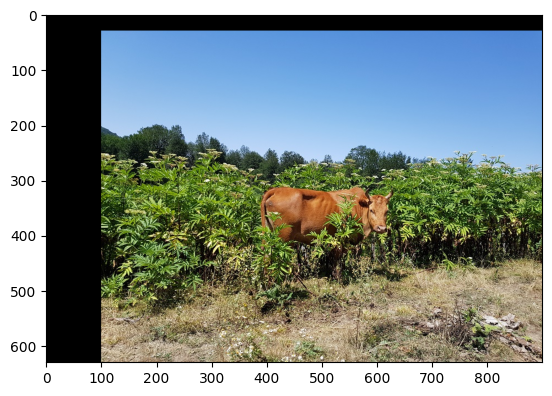

In [7]:
# Translation 
image = cv2.imread('images/input.jpg')
height, width, _ = image.shape

#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T is our translation matrix
T = np.float32([[1, 0, 100], [0, 1,30]])
# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width+100, height+30))
plt.imshow(img_translation[...,::-1])

[[ 4.69846310e-01  1.71010072e-01  1.60758454e+02]
 [-1.71010072e-01  4.69846310e-01  2.27450136e+02]]


(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'))

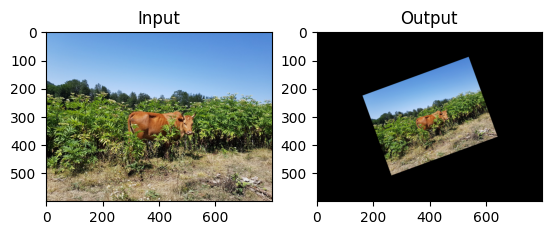

In [9]:
# Rotation
image = cv2.imread('images/input.jpg')
height, width = image.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 20, .5)
print(rotation_matrix)

rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

plt.subplot(121),plt.imshow(image[...,::-1]),plt.title('Input')
plt.subplot(122),plt.imshow(rotated_image[...,::-1]),plt.title('Output')

[[ 0.49240386 -0.08682409 50.        ]
 [ 0.08682409  0.49240386 50.        ]]


Text(0.5, 1.0, 'result')

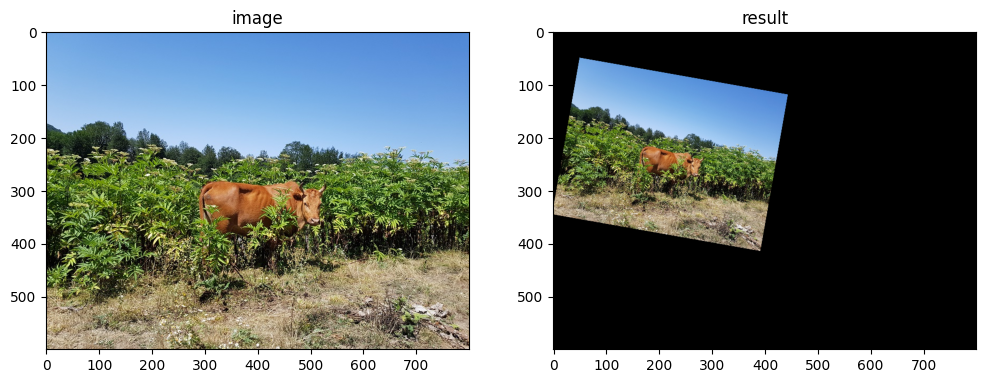

In [10]:
# Scale + Rotation

rotation_amount_degree = 10
theta = rotation_amount_degree * np.pi / 180.0  # in rads

image = cv2.imread('images/input.jpg')
height, width, _ = image.shape

T1 = np.float32([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]) # Rotate
T2 = np.float32([[0.5, 0], [0, 0.5]]) # Scale
T = np.matmul(T1,T2) 

final_T = np.ones((2,3))*50 # Rotate + Scale
final_T[:,:-1] = T

print(final_T)

result = cv2.warpAffine(image, final_T, (width, height))

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("image")
plt.subplot(122);plt.imshow(result[...,::-1]);plt.title("result")

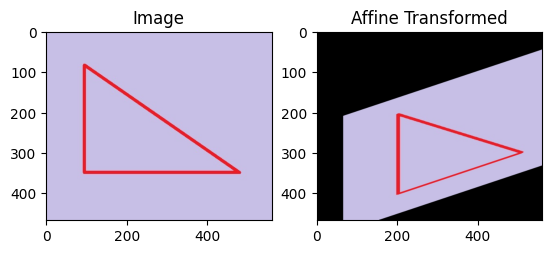

In [11]:
# calculate and apply affine transform

image = plt.imread("images/triangle.jpg")
rows,cols,ch = image.shape

pts1 = np.float32([[100,350],[100,90],[490,350]])
pts2 = np.float32([[200,400],[500,300],[200,200]])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(image,M,(cols,rows))

plt.subplot(121),plt.imshow(image),plt.title('Image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine Transformed')
plt.show()

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'))

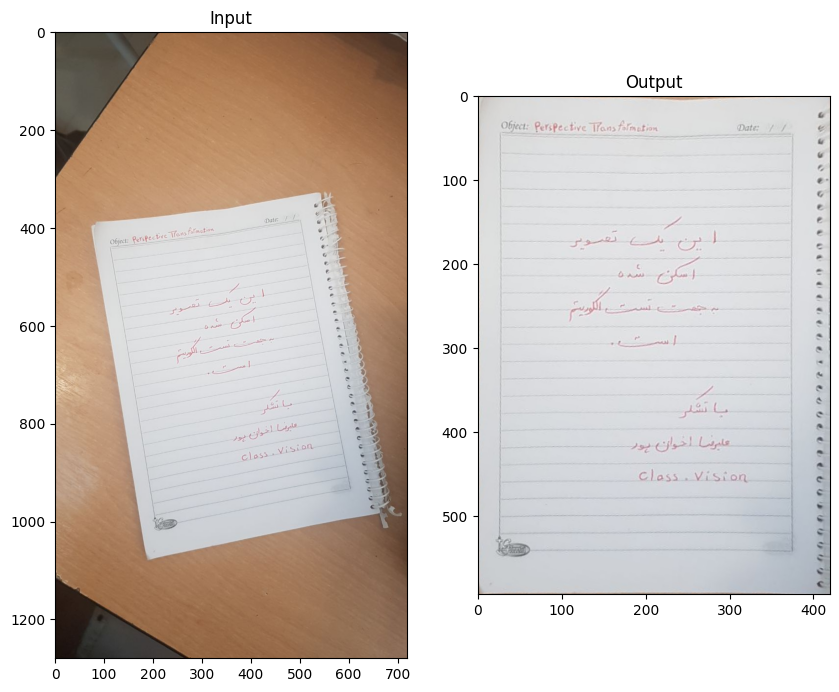

In [13]:
image = cv2.imread('images/scan.jpg')

# Cordinates of the 4 corners of the original image
points_A = np.float32([[74,396], [540,329], [187,1080], [664,982]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix, M    
M = cv2.getPerspectiveTransform(points_A, points_B)
warped = cv2.warpPerspective(image, M, (420,594))

plt.figure(figsize=[10,15])
plt.subplot(121),plt.imshow(image[...,::-1]),plt.title('Input')
plt.subplot(122),plt.imshow(warped[...,::-1]),plt.title('Output')

In [ ]:
''' 
1. Structure of a Homography Matrix:

A 3x3 matrix representing a projective transformation between two planes.
Conventionally denoted as H:
H = | h11 h12 h13 |
    | h21 h22 h23 |
    | h31 h32 h33 |


2. Scaling Factor:

Extract a scaling factor s from the matrix:
s = sqrt(abs(det(H)))


3. Affine vs Perspective Components:

Affine: If h33 = 1, the transformation is purely affine.
Extract a 2x3 affine transformation matrix A:
A = | h11 h12 h13 |
    | h21 h22 h23 |

Perspective: If h33 != 1, the transformation has perspective components.
Decompose using QR decomposition or SVD to separate affine and projective parts.
    
4. Rotation, Translation, and Shear:

Affine Transformation Matrix A:
Decompose further using polar decomposition to extract rotation (R) and shear/scaling (S):
A = R * S
Translation Vector:
Extract from the last column of H or A:
t = (h13, h23)

5. Normalization (Optional):

Normalize H by dividing by h33 to obtain a homogeneous representation for easier analysis.

'''